In [11]:
import pandas as pd
import numpy as np
import io

#### Upload Dataset 1

In [3]:
df1 = pd.read_csv('/content/sample_data/Dataset1.csv')

# New Section

In [4]:
df1.head(10)

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI
0,56,Female,3091,90,160,4,1,1.569070,81.199394,32.981343
1,69,Female,2090,106,27,0,9,1.629449,74.273566,27.973877
2,46,Male,2938,11,45,2,3,1.637726,71.453466,26.640417
3,32,Female,3022,48,112,1,8,1.514198,98.163045,42.813720
4,60,Female,2350,83,115,0,7,1.410559,57.323914,28.810685
5,25,Male,1939,23,71,4,11,1.692665,65.076352,22.713344
6,78,Male,3156,21,119,0,2,1.689306,57.114269,20.013738
7,38,Male,2213,90,112,0,11,1.854340,72.639988,21.125011
8,56,Male,1931,87,93,2,10,1.800220,55.153468,17.018513
9,75,Female,2447,60,0,2,0,1.657941,65.319929,23.763338


In [ ]:
df1.columns

Index(['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake', 'Physical_Activity',
       'Fast_Food_Frequency', 'Screen_Time', 'Height', 'Weight', 'BMI'],
      dtype='object')

In [20]:
# create a dataframe using pandas
df11 = pd.DataFrame(df1)
df11.dtypes

Age                      int64
Gender                  object
Calorie_Intake           int64
Sugar_Intake             int64
Physical_Activity        int64
Fast_Food_Frequency      int64
Screen_Time              int64
Height                 float64
Weight                 float64
BMI                    float64
Healthiness             object
dtype: object

In [7]:
df11["Healthiness"] = None

In [8]:
# create a new flag column based on BMI range, indicating to the healthiness level
df11.loc[(df11['BMI'] < 18.5), 'Healthiness'] = 'underweight'
df11.loc[(df11['BMI'] >= 18.5) &(df11['BMI'] < 25) , 'Healthiness'] = 'healthy'
df11.loc[(df11['BMI'] < 30)& (df11['BMI'] >= 25), 'Healthiness'] = 'overweight'
df11.loc[(df11['BMI'] >= 30), 'Healthiness'] = 'obese'
print(df11)

'''
example of adding a conditional column
df.loc[(df['column1'] > 2) & (df['column2'] < 40), 'new_column'] = 'Condition Met'
df.loc[(df['column1'] <= 2) | (df['column2'] >= 40), 'new_column'] = 'Condition Not Met'
'''

       Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0       56  Female            3091            90                160   
1       69  Female            2090           106                 27   
2       46    Male            2938            11                 45   
3       32  Female            3022            48                112   
4       60  Female            2350            83                115   
...    ...     ...             ...           ...                ...   
23530   51  Female            2858            65                 37   
23531   20  Female            2573            27                 27   
23532   26  Female            2246            37                 44   
23533   22    Male            1588            24                101   
23534   59    Male            3099            59                 61   

       Fast_Food_Frequency  Screen_Time    Height     Weight        BMI  \
0                        4            1  1.569070  81.199394  32.981343 

"\nexample of adding a conditional column\ndf.loc[(df['column1'] > 2) & (df['column2'] < 40), 'new_column'] = 'Condition Met'\ndf.loc[(df['column1'] <= 2) | (df['column2'] >= 40), 'new_column'] = 'Condition Not Met'\n"

In [25]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler

#sklearn.preprocessing.normalize(df11.Age, norm='l2', *, axis=1, copy=True, return_norm=False)[source]

cols_to_nom = df11.select_dtypes(np.number).columns
#print(cols_to_nom)
#df11[cols_to_nom] = minmax_scale(df[cols])
df11[cols_to_nom] = StandardScaler().fit_transform(df11[cols_to_nom])
df11.head()


,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Healthiness
0,0.417796,Female,1.030059,0.786635,1.352719,1.400787,-1.298835,-0.678371,0.744529,0.996849,obese
1,1.145177,Female,-0.702415,1.286573,-1.199099,-1.426859,1.017345,-0.173997,0.283316,0.268529,overweight
2,-0.141727,Male,0.765256,-1.681808,-0.853741,-0.013036,-0.719790,-0.104861,0.095516,0.074582,overweight
3,-0.925060,Female,0.910638,-0.525702,0.431762,-0.719947,0.727823,-1.136741,1.874193,2.426938,obese
4,0.641606,Female,-0.252421,0.567912,0.489322,-1.426859,0.438300,-2.002479,-0.845416,0.390240,overweight


<ipython-input-26-f315bcdc81e0>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df11.corr()


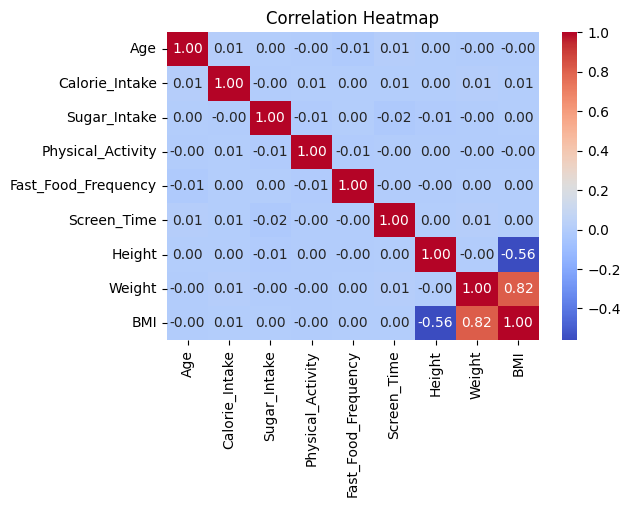

In [26]:
# visualization of important factors

import matplotlib.pyplot as plt
import seaborn as sns

# correlation heatmap

correlation_matrix = df11.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

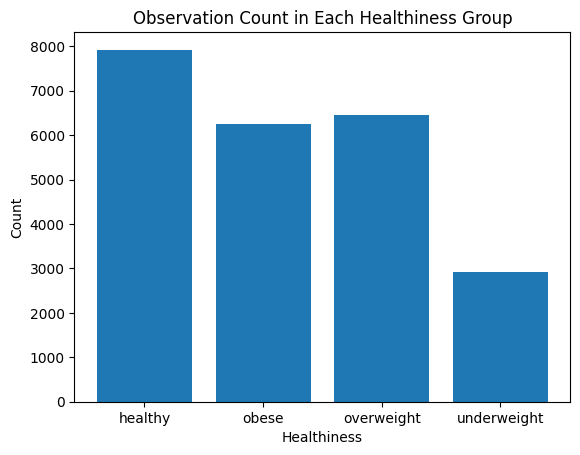

In [27]:
# counts of observations in each healthiness group

# create a new dataframe to store counts of observations in each group
group_counts = df11.groupby('Healthiness').size().reset_index(name='Count')

plt.bar(group_counts['Healthiness'], group_counts['Count'])
plt.xlabel('Healthiness')
plt.ylabel('Count')
plt.title('Observation Count in Each Healthiness Group')
plt.show()



In [28]:
# box plot
import plotly.express as px
import plotly.io as pio
# Create an interactive box plot for the 'Age' feature
fig_box = px.box(df11, x='Healthiness', y='Age', title='Box Plot of Age Grouped by Healthiness', color='Gender', color_discrete_sequence=['#0d7b94', '#82153d'])

# Customizing the layout and theme
fig_box.update_layout(template="plotly_white")

# Show the plot
fig_box.show()

In [29]:
# label encoding to Gender feature
# Using the map() function to transform the 'Gender' column
df11['Gender'] = df11['Gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows to see the transformation
print(df11.head())

        Age  Gender  Calorie_Intake  Sugar_Intake  Physical_Activity  \
0  0.417796       1        1.030059      0.786635           1.352719   
1  1.145177       1       -0.702415      1.286573          -1.199099   
2 -0.141727       0        0.765256     -1.681808          -0.853741   
3 -0.925060       1        0.910638     -0.525702           0.431762   
4  0.641606       1       -0.252421      0.567912           0.489322   

   Fast_Food_Frequency  Screen_Time    Height    Weight       BMI Healthiness  
0             1.400787    -1.298835 -0.678371  0.744529  0.996849       obese  
1            -1.426859     1.017345 -0.173997  0.283316  0.268529  overweight  
2            -0.013036    -0.719790 -0.104861  0.095516  0.074582  overweight  
3            -0.719947     0.727823 -1.136741  1.874193  2.426938       obese  
4            -1.426859     0.438300 -2.002479 -0.845416  0.390240  overweight  


In [ ]:
df11.head()

,Age,Gender,Calorie_Intake,Sugar_Intake,Physical_Activity,Fast_Food_Frequency,Screen_Time,Height,Weight,BMI,Healthiness
0,56,1,3091,90,160,4,1,1.569070,81.199394,32.981343,obese
1,69,1,2090,106,27,0,9,1.629449,74.273566,27.973877,overweight
2,46,0,2938,11,45,2,3,1.637726,71.453466,26.640417,overweight
3,32,1,3022,48,112,1,8,1.514198,98.163045,42.813720,obese
4,60,1,2350,83,115,0,7,1.410559,57.323914,28.810685,overweight


In [30]:
# implementation of KNN
'''
we are trying to predict Healthiness, so we set Healthiness as label,
  and Age, Gender, Calorie_Intake, Sugar_Intake, physical_Activity,
  Fast_Food_Frequency, Height, Weight would be features to predict Healthiness.
'''
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Split data into features and label
X = df11[['Age', 'Gender', 'Calorie_Intake', 'Sugar_Intake','Physical_Activity','Fast_Food_Frequency','Height','Weight']]
y = df11['Healthiness']

# Split data into training and testing sets in proportion of 7:3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Apply KNN
k = 3  # Setting value of k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1957    0  305   72]
 [   6 1597  278    0]
 [ 394  182 1372    0]
 [ 292    0    0  606]]
              precision    recall  f1-score   support

     healthy       0.74      0.84      0.79      2334
       obese       0.90      0.85      0.87      1881
  overweight       0.70      0.70      0.70      1948
 underweight       0.89      0.67      0.77       898

    accuracy                           0.78      7061
   macro avg       0.81      0.77      0.78      7061
weighted avg       0.79      0.78      0.78      7061



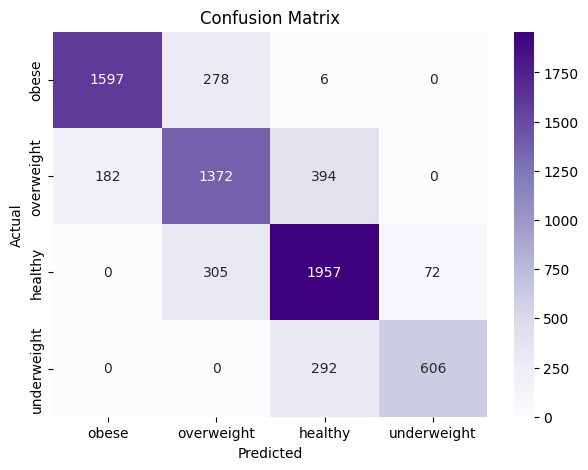

In [ ]:
# Visualization of KNN Results Using a Confusion Matrix Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Get unique classes
classes = df11['Healthiness'].unique()

# Plotting the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred, labels=classes), cmap='Purples', annot=True, fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()